In [1]:
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True
Cuda: True


In [2]:
grid_length = 5
diffable_classifier = gan.train_diffable_classifier(num_samples_per_batch=1000)

[Epoch 0] [Loss 222.216431]
[Epoch 1000] [Loss 47.323582]
[Epoch 2000] [Loss 4.355312]
[Epoch 3000] [Loss 1.900137]
[Epoch 4000] [Loss 1.598049]
[Epoch 5000] [Loss 1.104311]
[Epoch 6000] [Loss 1.079314]
[Epoch 7000] [Loss 1.635774]
[Epoch 8000] [Loss 0.826086]
[Epoch 9000] [Loss 0.854715]


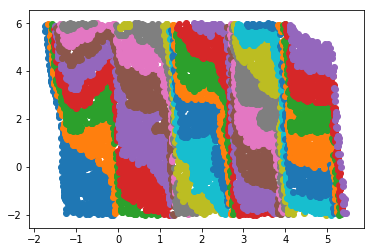

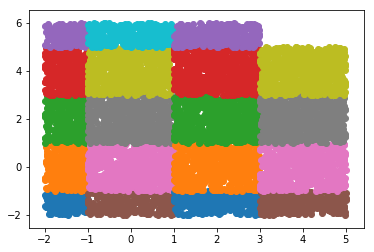

In [3]:
# let's see how good this classifier is
low = -2 * (grid_length // 2) + 2
high = 2 * (grid_length // 2) + 2

num_test_points = 10000
points = gan.sample_points_plane(low, high, num_test_points)
p = Variable(Tensor(points))
test_answers = np.rint(diffable_classifier(p).cpu().detach().numpy())
real_answers = gan.point_to_index(points, grid_length=grid_length)

# organize the points by their class
latent_vecs = []
latent_vecs_real = []
for i in range(grid_length * grid_length + 10):
    latent_vecs.append([])
    latent_vecs_real.append([])
    
for i in range(num_test_points):
    latent_vecs[int(test_answers[i])].append(points[i])
    latent_vecs_real[int(real_answers[i])].append(points[i])

colors = [(np.random.uniform(), np.random.uniform(), np.random.uniform()) for i in range(grid_length * grid_length)]

plt.clf()
for i in range(grid_length * grid_length):
    if len(latent_vecs[i]) == 0:
        continue
    plt.scatter(*zip(*latent_vecs[i]))
plt.show()
for i in range(grid_length * grid_length):
    if len(latent_vecs_real[i]) == 0:
        continue
    plt.scatter(*zip(*latent_vecs_real[i]))